In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyper as pr
from scipy import stats
import scipy

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context('talk')
plt.style.use('dark_background')

In [113]:
df = pd.read_csv('./data3a.csv')

In [89]:
df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [90]:
round(df.describe(),2)

,y,x
count,100.00,100.00
mean,7.83,10.09
std,2.62,1.01
min,2.00,7.19
25%,6.00,9.43
50%,8.00,10.16
75%,10.00,10.68
max,15.00,12.40


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
y    100 non-null int64
x    100 non-null float64
f    100 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


(0, 16)

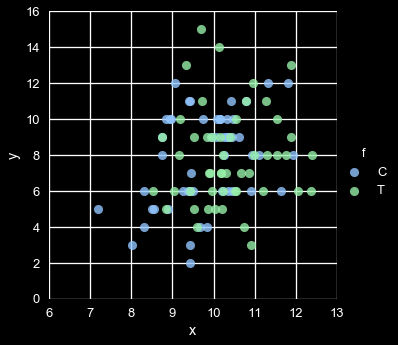

In [92]:
lm = sns.lmplot(x='x', y='y', hue='f', data=df, palette='pastel', fit_reg=False)
axes = lm.axes
axes[0][0].set_xlim(6,13)
axes[0][0].set_ylim(0,16)

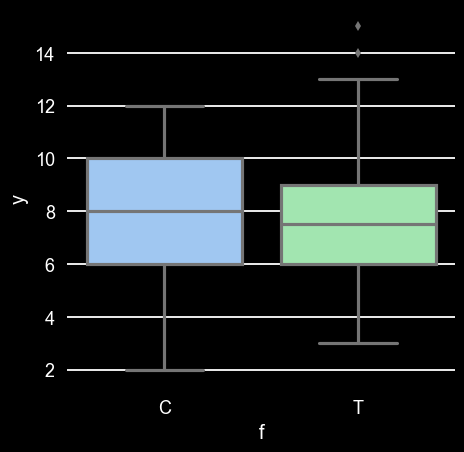

In [93]:
fig = plt.figure(figsize=(5,5),dpi=100)
sns.boxplot(x='f',y='y', data=df, palette='pastel')

log lambda = B1 + B2 xi

In [94]:
x = np.arange(-4, 4, 0.01)

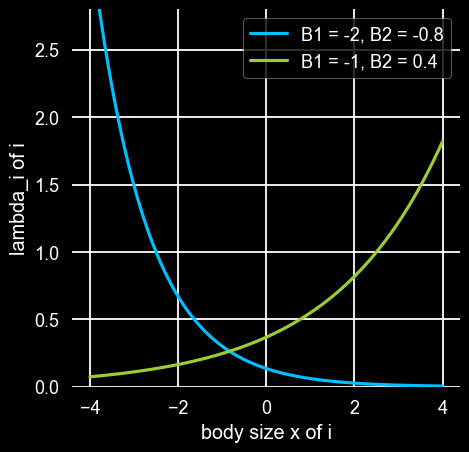

In [95]:
fig = plt.figure(figsize=(5,5),dpi=100)
ax = fig.add_subplot(111)
B1, B2 = -2, -0.8
ax.plot(x, np.exp(B1 + B2 * x), color = 'deepskyblue', label = 'B1 = %s, B2 = %s' % (B1, B2))
B1, B2 = -1, 0.4
ax.plot(x, np.exp(B1 + B2 * x), color = 'yellowgreen', label = 'B1 = %s, B2 = %s' % (B1, B2))
ax.set_ylim(0,2.8)
ax.set_xlabel('body size x of i')
ax.set_ylabel('lambda_i of i')
ax.legend(frameon = True)

ポアソン回帰

In [133]:
import statsmodels.api as sm
df['Intercept'] = 1.0
glm = sm.GLM(endog=df['y'], exog=df[['Intercept', 'x']], family=sm.families.Poisson())
fit = glm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 18 Jun 2018   Deviance:                       84.993
Time:                        17:46:27   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

Log-Likelihood: 最尤度

Deviance:  逸脱度

std err: 標準誤差の推定値。この場合には、B1, B2のばらつきを標準偏差であらわしたもの

P>|z|: z検定

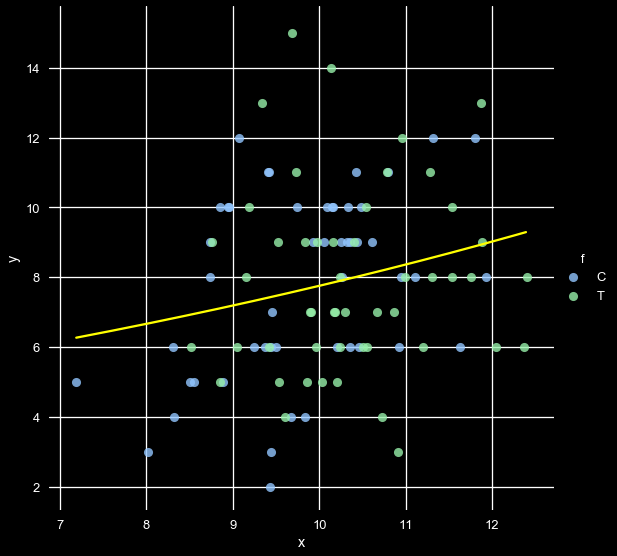

In [146]:
xx = np.arange(min(df['x']), max(df['x']), 0.01)
sns.lmplot(x='x', y='y', hue='f', data=df, palette='pastel', fit_reg=False, size=8)
plt.plot(xx, np.exp(fit.params[0] + fit.params[1]*xx), color = "yellow")

In [143]:
fit.params[0]

1.2917208386423793

In [122]:
df2 = df.copy()
df2['f'] = pd.get_dummies(df['f'])['T']

In [123]:
df2.head()

,y,x,f,Intercept
0,6,8.31,0,1.0
1,6,9.44,0,1.0
2,6,9.50,0,1.0
3,12,9.07,0,1.0
4,10,10.16,0,1.0


In [132]:
glm = sm.GLM(endog=df2['y'], exog=df2[['Intercept', 'f']], family=sm.families.Poisson())
fit2 = glm.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Mon, 18 Jun 2018   Deviance:                       89.475
Time:                        17:46:23   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f              0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [134]:
glm = sm.GLM(endog=df2['y'], exog=df2[['Intercept', 'x','f']], family=sm.families.Poisson())
fit3 = glm.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Mon, 18 Jun 2018   Deviance:                       84.808
Time:                        17:46:40   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
x              0.0801      0.037      2.162      0.031       0.007       0.153
f             -0.0320      0.074     -0.430      0.667      -0.178       0.114
==============================================================================
"""

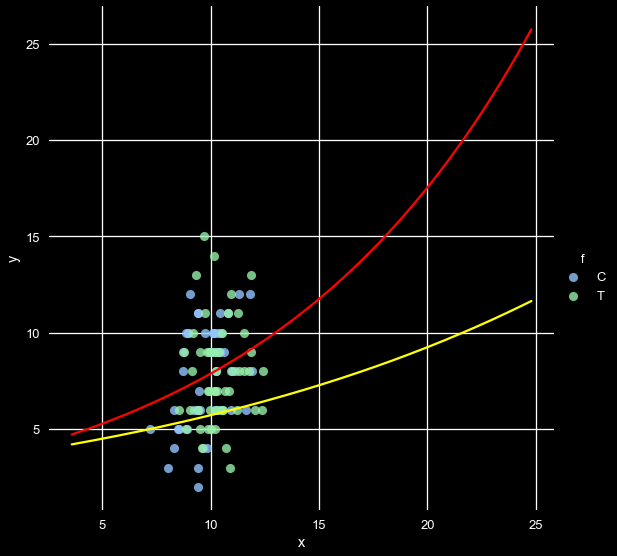

In [149]:
xx = np.arange(min(df['x'])/2, max(df['x']*2), 0.01)
sns.lmplot(x='x', y='y', hue='f', data=df, palette='pastel', fit_reg=False, size=8)
plt.plot(xx, np.exp(fit3.params[0] + fit3.params[1]*xx + fit3.params[2]*xx), color = "yellow")
plt.plot(xx, np.exp(fit3.params[0] + fit3.params[1]*xx), color = "red")